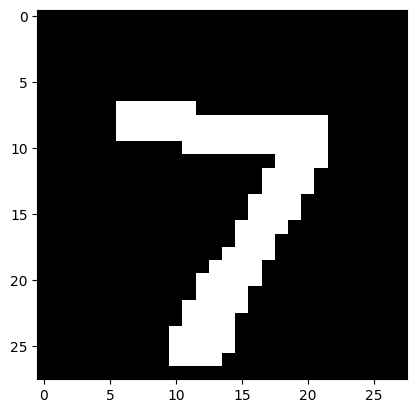

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 读入mnist数据集
m_x = np.loadtxt('mnist_x', delimiter=' ')
m_y = np.loadtxt('mnist_y')

# 数据集可视化
data = np.reshape(np.array(m_x[0], dtype=int), [28, 28])
plt.figure()
plt.imshow(data, cmap='gray')

# 将数据集分为训练集和测试集
ratio = 0.8
split = int(len(m_x) * ratio)
# 打乱数据
np.random.seed(0)   # 随机种子
idx = np.random.permutation(np.arange(len(m_x)))    # 打乱的排列索引
m_x = m_x[idx]  # 按照打乱的索引，重排样本
m_y = m_y[idx]
x_train, x_test = m_x[:split], m_x[split:]
y_train, y_test = m_y[:split], m_y[split:]

In [2]:
# n维空间欧氏距离
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

In [3]:
class KNN:
    def __init__(self, k, label_num):
        self.k = k
        self.label_num = label_num # 类别的数量

    def fit(self, x_train, y_train):
        # 在类中保存训练数据
        self.x_train = x_train
        self.y_train = y_train

    def get_knn_indices(self, x):
        # 获取距离目标样本点最近的K个样本点的索引
        # 计算已知样本的距离
        dis = list(map(lambda a: distance(a, x), self.x_train)) 
        # 按距离从小到大排序，返回排序后的索引
        knn_indices = np.argsort(dis) 
        # 取最近的K个
        knn_indices = knn_indices[:self.k] 
        return knn_indices

    def get_label(self, x):
        # 对KNN方法的具体实现，观察K个近邻并使用np.argmax获取其中数量最多的类别
        knn_indices = self.get_knn_indices(x)
        # 类别计数
        label_statistic = np.zeros(shape=[self.label_num]) 
        for index in knn_indices:
            label = int(self.y_train[index])
            label_statistic[label] += 1
        # 返回数量最多的类别
        return np.argmax(label_statistic) 

    def predict(self, x_test): 
        # 预测样本  x_test 的类别
        predicted_test_labels = np.zeros(shape=[len(x_test)], dtype=int)
        for i, x in enumerate(x_test):
            predicted_test_labels[i] = self.get_label(x)
        return predicted_test_labels

In [4]:
for k in range(1, 10):
    knn = KNN(k, label_num=10)
    knn.fit(x_train, y_train)
    predicted_labels = knn.predict(x_test)

    accuracy = np.mean(predicted_labels == y_test)
    print(f'K的取值为 {k}, 预测准确率为 {accuracy * 100:.1f}%')

K的取值为 1, 预测准确率为 88.0%
K的取值为 2, 预测准确率为 88.0%
K的取值为 3, 预测准确率为 88.5%
K的取值为 4, 预测准确率为 87.5%
K的取值为 5, 预测准确率为 88.5%
K的取值为 6, 预测准确率为 88.0%
K的取值为 7, 预测准确率为 88.0%
K的取值为 8, 预测准确率为 88.0%
K的取值为 9, 预测准确率为 86.5%


数据集大小： 200


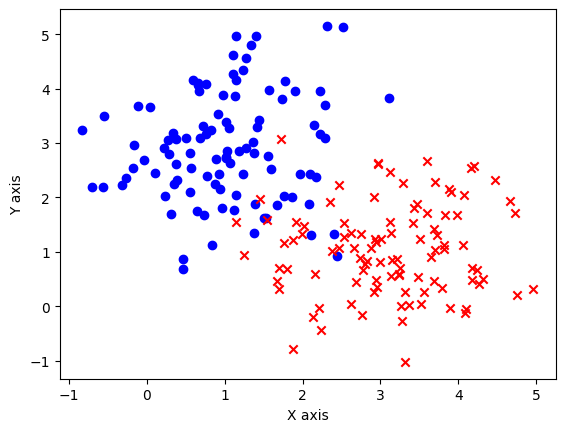

In [5]:
from sklearn.neighbors import KNeighborsClassifier # sklearn中的KNN分类器
from matplotlib.colors import ListedColormap

# 读入高斯数据集
data = np.loadtxt('gauss.csv', delimiter=',')
x_train = data[:, :2]   # 前两列是样本特征
y_train = data[:, 2]    # 第三列是样本标签
print('数据集大小：', len(x_train))

# 可视化
plt.figure()
# 标签为0的样本用蓝色圆点表示，标签为1的样本用红色叉号表示，坐标为样本的两个特征
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [6]:
# 设置步长
step = 0.02 
# 设置网格边界
x_min, x_max = np.min(x_train[:, 0]) - 1, np.max(x_train[:, 0]) + 1 
y_min, y_max = np.min(x_train[:, 1]) - 1, np.max(x_train[:, 1]) + 1
# 构造网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

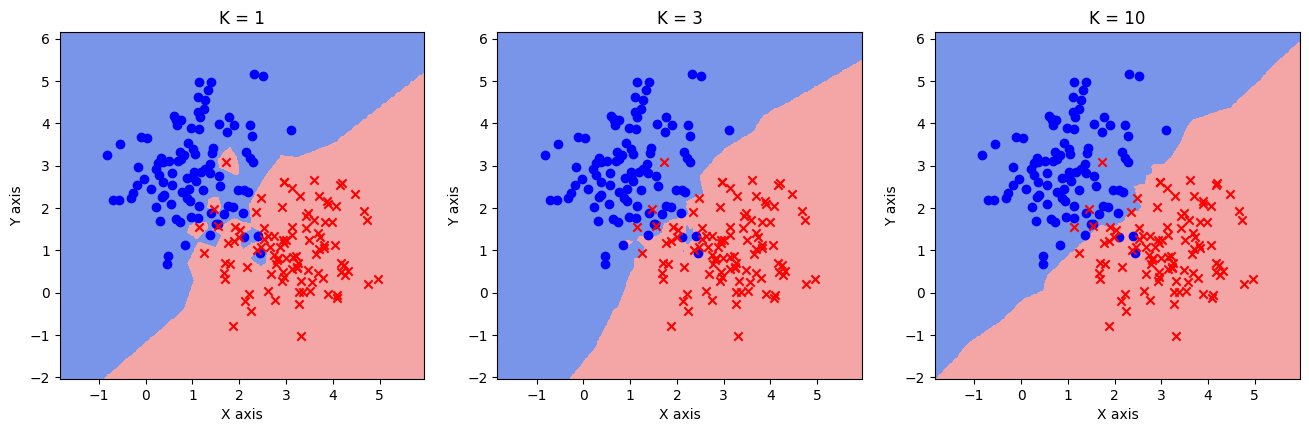

In [7]:
fig = plt.figure(figsize=(16,4.5))
# K值，读者可以自行调整，观察分类结果的变化
ks = [1, 3, 10] 
cmap_light = ListedColormap(['royalblue', 'lightcoral'])

for i, k in enumerate(ks):
    # 定义KNN分类器
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train, y_train)
    z = knn.predict(grid_data)

    # 画出分类结果
    ax = fig.add_subplot(1, 3, i + 1)
    # 根据区域左下角坐标(xx, yy)的预测类别z对区域染色
    # xx，yy均按行优先顺序遍历
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=cmap_light, alpha=0.7)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'K = {k}')
plt.show()

In [8]:
from skimage import io # 图像输入输出
from skimage.color import rgb2lab, lab2rgb # 图像通道转换
from sklearn.neighbors import KNeighborsRegressor # KNN 回归器
import os

path = 'style_transfer'

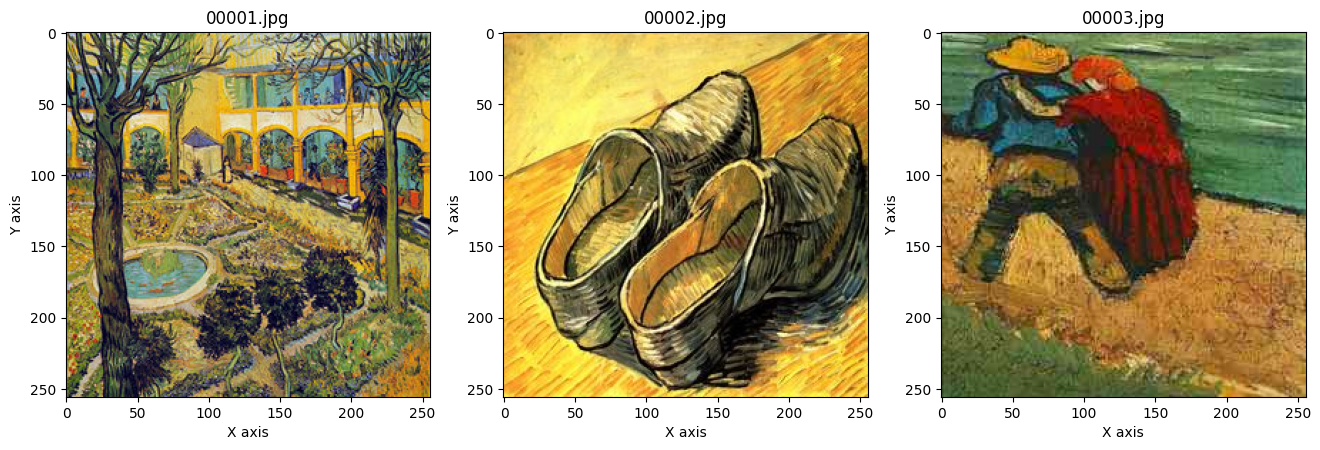

In [9]:
data_dir = os.path.join(path, 'vangogh')
fig = plt.figure(figsize=(16, 5))
for i, file in enumerate(np.sort(os.listdir(data_dir))[:3]):
    img = io.imread(os.path.join(data_dir, file))
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(img)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(file)
plt.show()

In [10]:
# block_size表示向外扩展的层数，扩展1层即3*3
block_size = 1 

def read_style_image(file_name, size=block_size):
    # 读入风格图像, 得到映射 X->Y
    # 其中X储存3*3像素格的灰度值，Y储存中心像素格的色彩值
    # 读取图像文件，设图像宽为W，高为H，得到W*H*3的RGB矩阵
    img = io.imread(file_name) 
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    # 将RGB矩阵转换成LAB表示法的矩阵，大小仍然是W*H*3，三维分别是L、A、B
    img = rgb2lab(img) 
    # 取出图像的宽度和高度
    w, h = img.shape[:2] 
    
    X = []
    Y = []
    # 枚举全部可能的中心点
    for x in range(size, w - size): 
        for y in range(size, h - size):
            # 保存所有窗口
            X.append(img[x - size: x + size + 1, y - size: y + size + 1, 0].flatten())
            # 保存窗口对应的色彩值a和b
            Y.append(img[x, y, 1:])
    return X, Y

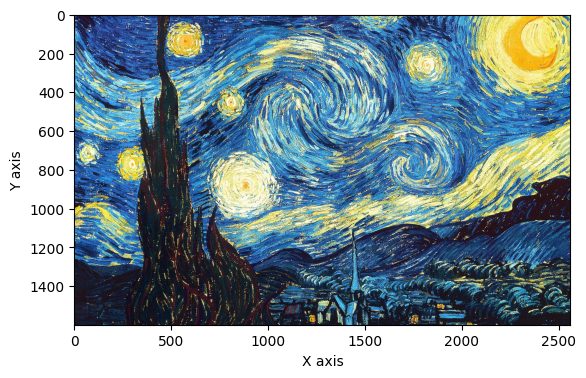

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
X, Y = read_style_image(os.path.join(path, 'style.jpg')) # 建立映射

# weights='distance'表示邻居的权重与其到样本的距离成反比
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(X, Y)

In [12]:
def rebuild(img, size=block_size):
    # 打印内容图像
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()
    
    # 将内容图像转为LAB表示
    img = rgb2lab(img) 
    w, h = img.shape[:2]
    
    # 初始化输出图像对应的矩阵
    photo = np.zeros([w, h, 3])
    # 枚举内容图像的中心点，保存所有窗口
    print('Constructing window...')
    X = []
    for x in range(size, w - size):
        for y in range(size, h - size):
            # 得到中心点对应的窗口
            window = img[x - size: x + size + 1, \
                y - size: y + size + 1, 0].flatten()
            X.append(window)
    X = np.array(X)

    # 用KNN回归器预测颜色
    print('Predicting...')
    pred_ab = knn.predict(X).reshape(w - 2 * size, h - 2 * size, -1)
    # 设置输出图像
    photo[:, :, 0] = img[:, :, 0]
    photo[size: w - size, size: h - size, 1:] = pred_ab
    
    # 由于最外面size层无法构造窗口，简单起见，我们直接把这些像素裁剪掉
    photo = photo[size: w - size, size: h - size, :]
    return photo

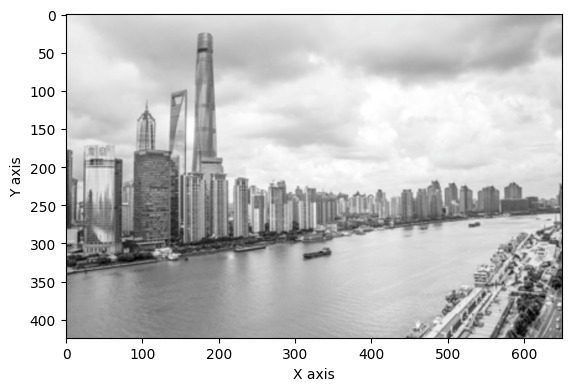

Constructing window...
Predicting...


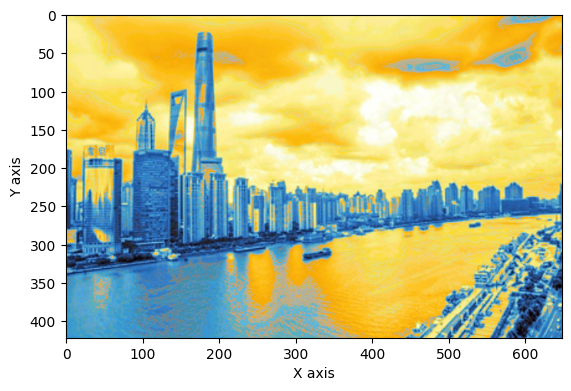

In [13]:
content = io.imread(os.path.join(path, 'input.jpg'))
new_photo = rebuild(content)
# 为了展示图像，我们将其再转换为RGB表示
new_photo = lab2rgb(new_photo)

fig = plt.figure()
plt.imshow(new_photo)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()